Graphische Darstellung des Signals. Bestimmung der Grundperiode anhand des
 Plots die Grundperiode (in ms) und die Grundfrequenz (in Hz) des Signals. Wie
 groß sind Signaldauer (in s), Abtastfrequenz (in Hz), Signallänge M (Anzahl der
 Abtastzeitpunkte) und Abtastintervall ∆t (in s)?

[[-25.00999905  -0.3721702 ]
 [-25.00499905  -0.3721702 ]
 [-24.99999905  -0.5579478 ]
 ...
 [ 24.98999969  -5.398007  ]
 [ 24.99499969  -5.212229  ]
 [ 24.99999968  -5.025836  ]]


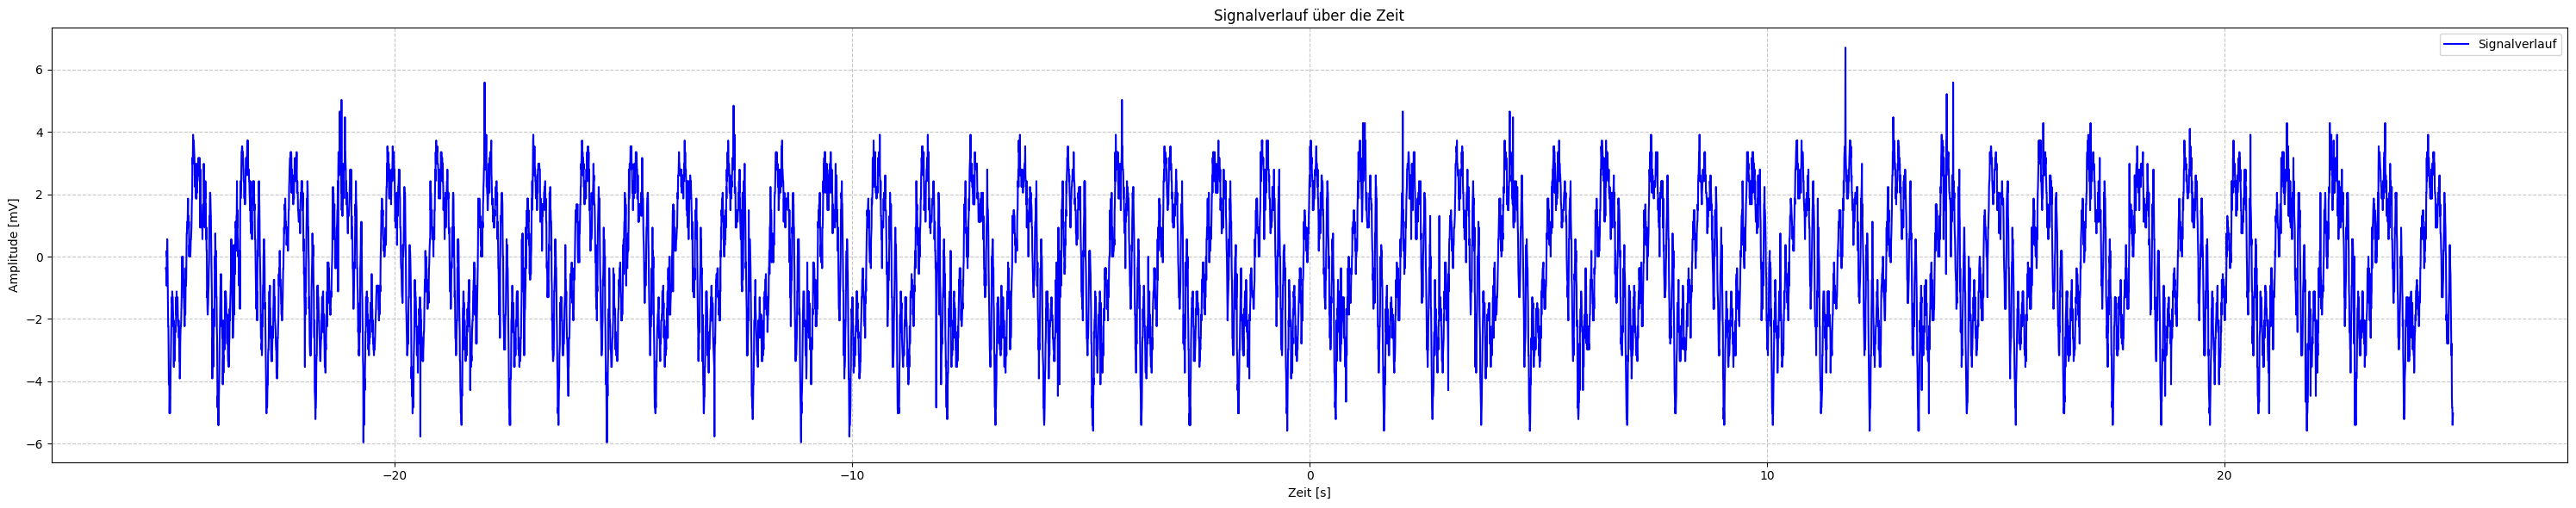

Grundperiode: 1.0640425261702127 ms
Grundfrequenz: 939.8120614589346 Hz
Signaldauer: 50.00999873 ms
Abtastfrequenz: 200020.001080292 Hz
Signallänge M: 10003
Abtastintervall ∆t: 4.999500022993102e-06 s


In [12]:
import os
import numpy as np

# get current working directory
path = os.getenv('DATA_PATH')
if not path:
    raise ValueError("DATA_PATH environment variable is not set")

# Replace the German decimal comma with a dot and remove separators
converters = {i: lambda s: float(s.decode().replace(',', '.')) for i in range(2)}

# Read in csv file
csv_data = np.genfromtxt(f"{path}\\Versuch3_Messungen\\Versuch_3_Ton1.csv", delimiter=";", skip_header=3, skip_footer=1, dtype=float, converters=converters)

# Show signal
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
plt.plot(csv_data[:,0], csv_data[:,1], label="Signalverlauf", color='blue')
plt.xlabel("Zeit [s]")
plt.ylabel("Amplitude [mV]")
plt.title("Signalverlauf über die Zeit")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

number_of_periods = 47
signal_duration = csv_data[-1, 0] - csv_data[0, 0]
signal_period = signal_duration/number_of_periods
signal_frequency = 1000/signal_period # 1000 ms to one s
print(f"Grundperiode: {signal_period} ms")
print(f"Grundfrequenz: {signal_frequency} Hz")
print(f"Signaldauer: {signal_duration} ms")
samples = len(csv_data)
sampling_period = signal_duration / samples / 1000 # in s
sampling_frequency = 1 / sampling_period
print(f"Abtastfrequenz: {sampling_frequency} Hz")
print(f"Signallänge M: {samples}")
print(f"Abtastintervall ∆t: {sampling_period} s")

Fouriertransformierte des Signals berechnen.
Bestimmung und Darstellung des Amplitudenspektrums.
Achtung: die Frequenzachse des numerisch berechneten Spektrums ist
nicht in der Einheit Hertz angegeben, sondern in der Einheit Anzahl Schwingungen
innerhalb der gesamten Signaldauer, d.h. der n-te Eintrag im Spektrum f[n] entspricht
n Schwingungen innerhalb der Gesamtlänge des Signals von M · ∆t s. Die zugehörige
Frequenz f in Hertz berechnet sich folglich aus
f = n/(M·∆t).
Darstellung des Amplitudenspektrums in Hertz mithilfe dieser Umrechnung.

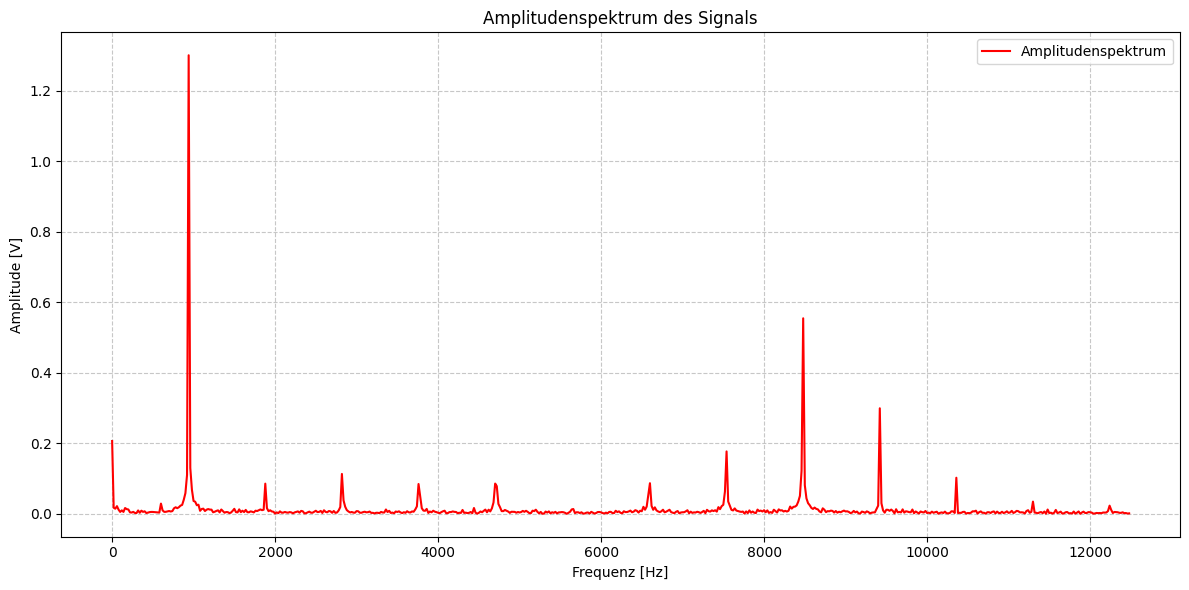

In [8]:
time_values = csv_data[:,0]
amplitude_values = csv_data[:,1]

M = samples
delta_t = sampling_period 

# Calculate the Fourier transform
fft_result = np.fft.fft(amplitude_values)
amplitude_spectrum = np.abs(fft_result) / M

# Calculate the frequency axis in Hz
frequencies = np.array(range(M))
for n in range(M):
    frequencies[n] = n / (M * delta_t)
    

# Keep positive frequencies only by slicing the arrays in half
positive_freqs = frequencies[:M // 2]
positive_amplitudes = amplitude_spectrum[:M // 2]

lower_freqs = frequencies[:M // 16]
lower_freq_amplitudes = amplitude_spectrum[:M // 16]

# Plot the amplitude spectrum
plt.figure(figsize=(12, 6))
#plt.plot(positive_freqs, positive_amplitudes, label="Amplitudenspektrum", color='red')
#plt.plot(frequencies, amplitude_spectrum, label="Amplitudenspektrum", color='red')
#plt.plot( amplitude_spectrum, label="Amplitudenspektrum", color='red')
plt.plot(lower_freqs, lower_freq_amplitudes, label="Amplitudenspektrum", color='red')
plt.xlabel("Frequenz [Hz]")
plt.ylabel("Amplitude [V]")
plt.title("Amplitudenspektrum des Signals")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Grundfrequenz im Spektrum identifizieren und aus der gefundenen
Wellenzahl die Frequenz in Hz berechnen. Welche Amplitude hat diese Fourierkomponente?

TODO
Amplitude mit Abstand zur x-Achse muss eventuell die doppelte sein, wenn man die gesamte Auslenkung als Amplitude möchte. 
Im unteren Schaubild werden die negativen Frequenzen weggelassen.

In [9]:
max_amplitude = max(amplitude_spectrum)
wave_number = np.argmax(amplitude_spectrum)
frequency = wave_number / (M * delta_t)

print(f"Die Grundfrequenz beträgt {frequency} Hz und hat eine Amplitude von {max_amplitude} V.")

Die Grundfrequenz beträgt 939.8120614589346 Hz und hat eine Amplitude von 1.3009478762532964 V.


Daten der Tabellen in Numpy-Arrays übertragen und Amplituden und Phasengang graphisch darstellen.

Erstellung eines Bode-Diagramms für beide Lautsprecher mithilfe von matplotlib.
Halblogarithmische Darstellung beider Diagramme mit der Funktion semilogx() 
und Berechnung der zugehörigen Angaben in Dezibel nach der Formel aus der
 Vorlesung und den Phasenwinkel nach der Formel:
 φH =−∆t·f ·360◦.
 Achtung: Bei höheren Frequenzen wird die Phasenverschiebung größer als
 360◦ , d.h. größer als eine Periode des Signals. Dieser Vorgang kann nur durch
 Vergleich mit der Phase der nächsttieferen Frequenz festgestellt werden, indem man
 annimmt, dass bei einem Lautsprecher keine plötzlichen Phasensprünge vorkommen
 (was zu hörbaren Verzerrungen führen würde).

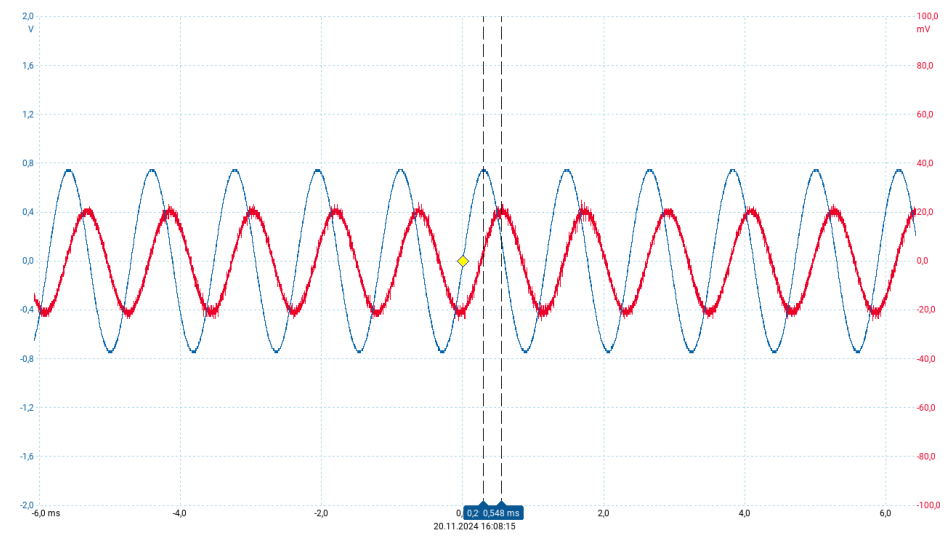

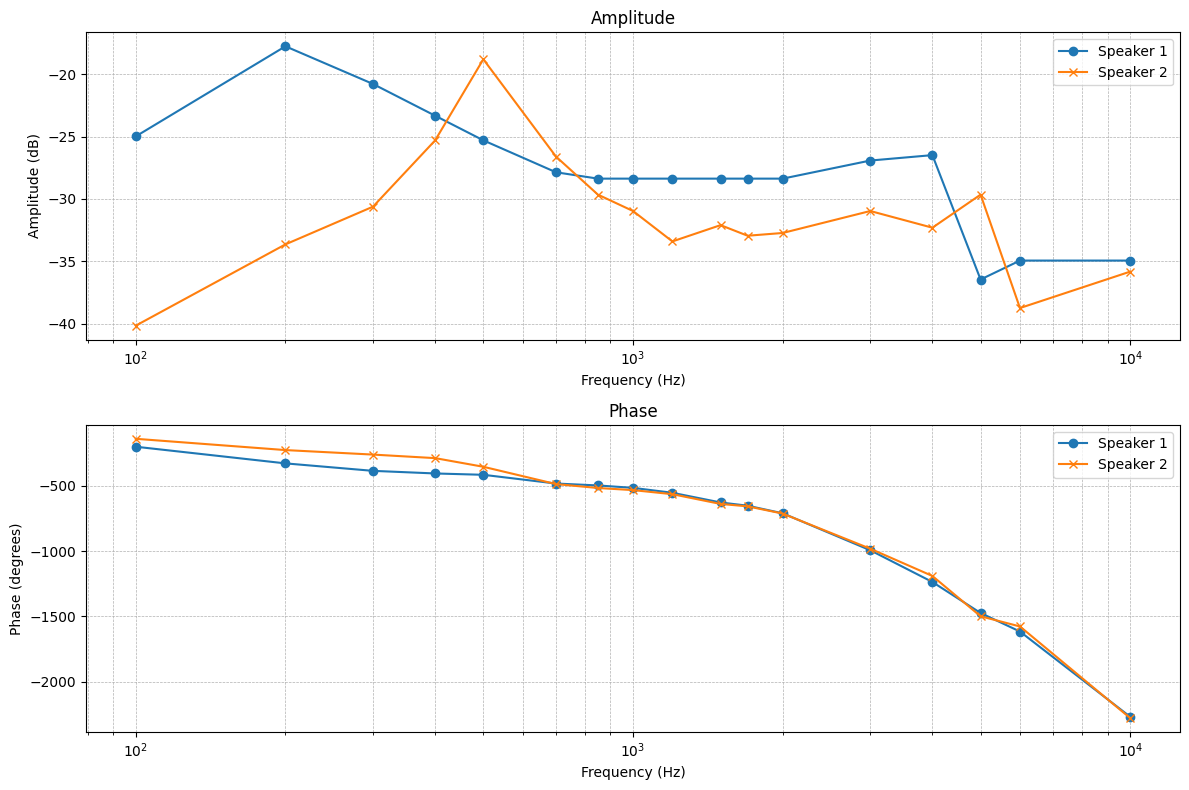

In [50]:
from matplotlib import image as mpimg
from numpy import log10

# Show the 
image = mpimg.imread(f"{path}\\Versuch3_Messungen\\Versuch_3_Frequenz_850_Hz.png")
# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')  # Turn off axes for better display
plt.show()


# Read in csv for Speaker 1
speaker_1_path = f"{path}\\Versuch3_Messungen\\Versuch3_Frequenztabelle_Lautsprecher1.CSV"
with open(speaker_1_path, 'r') as file:
    lines = file.read().splitlines()[1:]

speaker_1_data = []
for x in lines:
    speaker_1_data.append([float(y.replace(',', '.')) for y in x.split(';')])
speaker_1_data = np.array(speaker_1_data)

# Phasenverschiebung anpassen
speaker_1_data[0][3] = speaker_1_data[0][3] + (10.0/1.0) * 0 # nicht größer als 360°
speaker_1_data[1][3] = speaker_1_data[1][3] + (10.0/2.0) * 0 # nicht größer als 360°
speaker_1_data[2][3] = speaker_1_data[2][3] + (10.0/3.0) * 1
speaker_1_data[3][3] = speaker_1_data[3][3] + (10.0/4.0) * 1
speaker_1_data[4][3] = speaker_1_data[4][3] + (10.0/5.0) * 1
speaker_1_data[5][3] = speaker_1_data[5][3] + (10.0/6.0) * 1
speaker_1_data[6][3] = speaker_1_data[6][3] + (10.0/7.0) * 1
speaker_1_data[7][3] = speaker_1_data[7][3] + (10.0/8.0) * 1
speaker_1_data[8][3] = speaker_1_data[8][3] + (10.0/9.0) * 1
speaker_1_data[9][3] = speaker_1_data[9][3] + (10.0/10.0) * 1
speaker_1_data[10][3] = speaker_1_data[10][3] + (10.0/11.0) * 1
speaker_1_data[11][3] = speaker_1_data[11][3] + (10.0/12.0) * 1
speaker_1_data[12][3] = speaker_1_data[12][3] + (10.0/13.0) * 1
speaker_1_data[13][3] = speaker_1_data[13][3] + (10.0/14.0) * 1
speaker_1_data[14][3] = speaker_1_data[14][3] + (10.0/15.0) * 1
speaker_1_data[15][3] = speaker_1_data[15][3] + (10.0/16.0) * 1
speaker_1_data[16][3] = speaker_1_data[16][3] + (10.0/17.0) * 1
    
# Read in csv for Speaker 2
speaker_2_path = f"{path}\\Versuch3_Messungen\\Versuch3_Frequenztabelle_Lautsprecher2.CSV"
with open(speaker_2_path, 'r') as file:
    lines = file.read().splitlines()[1:]

speaker_2_data = []
for x in lines:
    speaker_2_data.append([float(y.replace(',', '.')) for y in x.split(';')])
speaker_2_data = np.array(speaker_2_data)

# Phasenverschiebung anpassen
speaker_2_data[5][3] = speaker_2_data[5][3] + (10.0/6.0) * 1
speaker_2_data[6][3] = speaker_2_data[6][3] + (10.0/7.0) * 1
speaker_2_data[7][3] = speaker_2_data[7][3] + (10.0/8.0) * 1
speaker_2_data[8][3] = speaker_2_data[8][3] + (10.0/9.0) * 1
speaker_2_data[9][3] = speaker_2_data[9][3] + (10.0/10.0) * 1
speaker_2_data[10][3] = speaker_2_data[10][3] + (10.0/11.0) * 1
speaker_2_data[11][3] = speaker_2_data[11][3] + (10.0/12.0) * 1
speaker_2_data[12][3] = speaker_2_data[12][3] + (10.0/13.0) * 1
speaker_2_data[13][3] = speaker_2_data[13][3] + (10.0/14.0) * 1
speaker_2_data[14][3] = speaker_2_data[14][3] + (10.0/15.0) * 1
speaker_2_data[15][3] = speaker_2_data[15][3] + (10.0/16.0) * 1
speaker_2_data[16][3] = speaker_2_data[16][3] + (10.0/17.0) * 1

# Normalize the amplitude values by deviding them by the spitze-spitze A amplitude
amplitude_speaker_1 = speaker_1_data[:,2] / 1000 / speaker_1_data[:,1] # mV to V
amplitude_speaker_2 = speaker_2_data[:,2] / 1000 / speaker_2_data[:,1]

delta_t_speaker_1 = speaker_1_data[:,3] / 1000 # ms to s
f = speaker_1_data[:,0]
# Phasengang in Grad
phase_response_speaker_1 = -1 * delta_t_speaker_1 * f * 360

delta_t_speaker_2 = speaker_2_data[:,3] / 1000 # ms to s
phase_response_speaker_2 = -1 * delta_t_speaker_2 * f * 360

amplitude_db_speaker_1 = 20 * log10(amplitude_speaker_1)
amplitude_db_speaker_2 = 20 * log10(amplitude_speaker_2)

# Bode-Diagramm erstellen
plt.figure(figsize=(12, 8))


# Amplitudengang
plt.subplot(2, 1, 1)
plt.semilogx(f, amplitude_db_speaker_1, label="Speaker 1", marker='o')
plt.semilogx(f, amplitude_db_speaker_2, label="Speaker 2", marker='x')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.title("Amplitude")
plt.legend()

# Phasengang
plt.subplot(2, 1, 2)
plt.semilogx(f, phase_response_speaker_1, label="Speaker 1", marker='o')
plt.semilogx(f, phase_response_speaker_2, label="Speaker 2", marker='x')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (degrees)")
plt.title("Phase")
plt.legend()

plt.tight_layout()
plt.show()

Erst ab 100 Hz ergibt es Sinn den Lautsprecher zu messen.
Nur bis 2000 Hz ist das Mikrofon eben in seinem Frequenzgang.
Alles größer als 2000 Hz ist im Amplitudenspektrum des Bode Diagrams nicht mehr gut vergleichbar.
Die Phase sollte davon aber unbeeinträchtigt sein.

Der Anstieg der Amplitude ab 2000 Hz sollte bei beiden Lautsprechern auf das Mikrofon zurückzuführen sein.
Der starke Abfall vom ersten Lautsprecher von 4000 auf 5000 Hz und der vom zweiten Lautsprecher von 5000 auf 6000 Hz dagegen muss ein Effekt der Lautsprecher sein, da das Mikrofon erst bei 15000 Hz abfällt.

Die beiden Lautsprecher haben jeweils eine Frequenz auf die sie besonders stark ansprechen (Lautsprecher 1: 200 Hz, Lautsprecher 2: 500 Hz).

Der zweite Lautsprecher gibt 100 Hz schlechter wieder als der erste.

Die Phasenverschiebung steigt bei beiden Lautsprechern mit zunehmender Frequenz sehr
ähnlich an.

Der zweite Lautsprecher ist durchschnittlich leiser als der erste.

Zu beachten ist, dass der erste Lautsprecher bei uns eine eingebeulte Membran aufwies.